# Desafio Indicium para Cientista de dados
<b>Nome:</b> Fábio Dias Rezende Carvalho </br>
<b>E-mail:</b> fabior.carvalho@hotmail.com </br>
O seguinte trabalho tem por objetivo avaliar minha capacidade técnica em resolução de problemas de ciência de dados, análise e exploração de dados, assim como desenvolvimento e aplicação de um modelo de machine learning.

## Introdução
O desafio é desenvolver uma plataforma de alugueis temporários na cidade de Nova York. O objetivo é desenvolver um modelo de previsão de preços, baseado no conjunto de dados descrito como 'teste_indicium_precificacao.csv' na pasta 'src', e avaliar o modelo de ml utilizando as métricas de avaliação cabiveis ao problema.

#### Entregas
<ul>
  <li><b>Análise exploratória:</b> fazer uma análise exploratória dos dados demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas.</li>
  <li><b>Responder as seguintes perguntnas:</b> 
  <ul>
    <li>Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a
    compra?</li>
    <li>O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?</li>
    <li>Existe algum padrão no texto do nome do local para lugares de mais alto valor?</li>
  </ul></li>
  <li><b>Preço:</b> Como fazer a previsão do preço com base nos dados? Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?</li>
  <li><b>Sugestão de preço: </b>Encontrar a sugestão de preço para um apartamento com as caracteristicas dadas.</li>
  <li><b>Modelo: </b>Deve ser entregue no formato '.pkl'.</li> 
</ul>

#### Habilidades utilizadas
<ul>
  <li><b>Análise exploratória:</b> Utilização de metódos e gráficos para uma análise exploratória eficaz;</li>
  <li><b>Desenvolvimento em python:</b> Utilização de python para análise exploratória e desenvolvimento do modelo de machine learning </li>
  <li><b>Análise de dados:</b> Utilização de python para análise dos dados e responder as perguntas sobre precificação, padrões nos dados, entre outros.</li>
  <li><b>Machine Learning - Regressão Linear:</b> Utilização de python e técnicas de machine learning para desenvolver um modelo de regressão linear para encontrar o valor das casas do nosso conjunto de dados.</li>
</ul>

#### Dados do projeto
* Id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo;
* nome - Representa o nome do anúncio;
* host_id - Representa o id do usuário que hospedou o anúncio;
* host_name - Contém o nome do usuário que hospedou o anúncio;
* bairro_group - Contém o nome do bairro onde o anúncio está localizado;
* bairro - Contém o nomeda área onde o anúncio está localizado;
* latitude - Contém a latitude do local;
* longitude - Contém a longitude do local;
* room_type - Contém o tipo de espaço de cada anúncio;
* price - Contém o preço por noite em dólares listado pelo anfitrião;
* minimo_noites - Contém o número mínimo de noites que o usuário deve reservar;
* numero_de_reviews - Contém o número de comentários dados a cada listagem;
* ultima_review - Contém a data da última revisão dada à listagem;
* reviews_por_mes - Contém o número de avaliações fornecidas por mês;
* calculado_host_listings_count - Contém a quantidade de listagem por host;
* disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva;

# Exploraçao de dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dados = pd.read_csv('src/teste_indicium_precificacao.csv')
dados.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [2]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

Importante observar a falta de valores em algumas colunas que serão relembrados mais a frente nesse notebook.

## Comportamento e relação entre os dados

In [3]:
dados.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Pode-se observar que o maior valor de uma variavel dentro dos nossos dados é a longitude, com interferência de -0,15. Podemos observar os valores de longitude e latitude em comparação com o mapa da região, que permitem uma ideia melhor da distribuição das casas que estão sendo analisadas.

![mapa Nova York](src/nova_york_map.png)

Para uma análise preliminar da distribuição das casas dentro do nossos dados podemos plotar um gráfico da concentração dos imóveis, teenso uma noção geogŕafica da distribuição:

<Axes: xlabel='longitude', ylabel='latitude'>

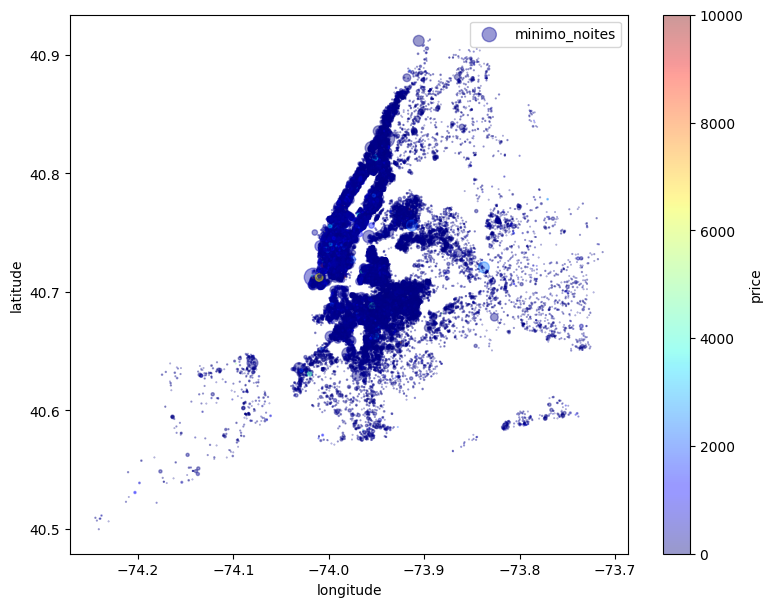

In [4]:
import math

dados.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=dados['minimo_noites']/6, label="minimo_noites",
figsize=(9,7),
c="price", cmap=plt.get_cmap("jet"), colorbar=True)

Aqui temos os valores do aluguel dos imóveis responsavel pela cor de cada circulo em 'c' (onde fica claro a alta concentração de valores menores, que estão em azul, o que já era esperado devido a observação do comportamento dos valores minimos e máximos dentro dessa coluna), e o tamanho dos circulos de cada residencia sendo referenciados pelo minimo de noites de cada casa em 's' (varia de forma relativamente grande também os valores máximos e minimos, por isso da divisão).

Também podemos observar uma alta concentração de imóveis dentro de Manhattan e Brooklyn (serão mais observados futuramente), ja em staten Island a distribuição é bem menor no nosso conjunto de dados.

Agora vamos analisar a correlação dentro do nosso conjunto de dados.

In [5]:
dados.corr()['price'].sort_values(ascending=False)

price                            1.000000
disponibilidade_365              0.081833
calculado_host_listings_count    0.057472
minimo_noites                    0.042799
latitude                         0.033939
host_id                          0.015309
id                               0.010618
reviews_por_mes                 -0.030608
numero_de_reviews               -0.047954
longitude                       -0.150020
Name: price, dtype: float64

Aqui podemos observar como a longitude exerce uma influência negativa dentro do preço, isso ocorre por termos um maior valor das casas dentro de Manhattan e Brooklyn (relativamente próximas na longitude e com preço elevado do mercado imobiliário). Como os dados são bem distribuidos geograficamente tem-se essa forte influência da longitude e, mesmo sendo uma influência negativa, tem-se que essa é maior influência dentro do conjunto de dados, seguido da disponibilidade, host_list_count e numero de reviews.

Abaixo ocorrem pequenas consultas que estão comentadas, mas elas fizeram a base para a tomada de decisões que vem na sequência.

In [6]:
#dados.query('nome.isnull()')
#dados.query('host_name.isnull()')
#38894/dados.shape[0]

Como observado em 'dados.describe()' existem valores nulos em algumas colunas. Nas colunas 'nome' (16 valores nulos) e 'host_name'(21 valores nulos) tem-se poucos valores nulos e a falta de nome, apesar de ser uma analise pedida na entrega, será mantida para preservar as informações nelas contidas.</br>
Já as colunas 'ultima_review' e 'reviews_por_mes' possuem mais de 20% de valores nulos dentro dessas colunas, para não ter perda das informações das linhas referentes estou decidindo por remover ambas as colunas por completo.</br>
As colunas 'id', 'host_id', 'host_name' também serão removidas pois não precisam fazer parte da nossa análise uma vez que os nomes do proprietários não devem ser levados em conta.

In [7]:
dados = dados.drop(columns=['id', 'host_id', 'host_name','ultima_review', 'reviews_por_mes'])
dados.shape

(48894, 11)

In [8]:
dados.describe()

,latitude,longitude,price,minimo_noites,numero_de_reviews,calculado_host_listings_count,disponibilidade_365
count,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000
mean,40.728951,-73.952169,152.720763,7.030085,23.274758,7.144005,112.776169
std,0.054529,0.046157,240.156625,20.510741,44.550991,32.952855,131.618692
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,40.723075,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,40.763117,-73.936273,175.000000,5.000000,24.000000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


Aqui podemos observar alguns pontos relevantes dentro do nosso conjunto de dados.
* <b>price -</b> Aqui com o 'describe' podemos observar que existe um valor de zero como minimo, o que ja afeta nosso conjunto de dados, e um valor máximo muito acima em relação ao 75% superior, o que também eleva o valor resultante da média, também influenciando no desvio padrão. Faremos uma análise visual dos boxplots em sequência para confirmar os outliers e tomar decisões mais precisas. Aqui ainda temos uma grande região para uma análise única, então olharei o comportamento em diferente regiões para entender o comportamento dos dados.

#### Os valores dentro de cada região de Nova York

In [9]:
dados.bairro_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

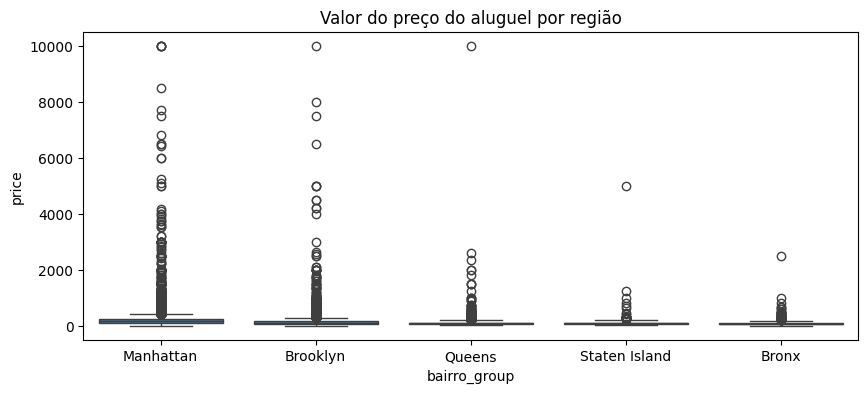

In [10]:
boxplot = sns.boxplot(x='bairro_group', y='price', data=dados)
boxplot.figure.set_size_inches(10,4)
boxplot.set_title('Valor do preço do aluguel por região');

Como citado nossa variável principal de análise, que é o preço do aluguel definido como 'price', possui forte influencia de outliers, o que gera uma serie de problemas nos nossos dados para serem analisados e futuramente para desenvolvimento do nosso modelo de ml, então será necessário ter isso em mente no nosso desenvolvimento e análise.
* <b>disponibilidade_365 -</b> Podemos observar que existem casas dentro do nosso dataset que não possui disponibilidade, isso é relevante de se observar para a pergunta <b>sobre considerar um investimento em uma casa em NY para alugar</b>, uma vez que considerando como um investimento o lucro máximo dessa casa vai se dar quando ela estiver ocupada em todos os dias do ano.
* <b>minimo_noites -</b> O dataset traz que a maior parte do nosso conjunto de dados possui alugueis de noites unicas, ou poucos dias em sequência, onde em 75% tem-se apenas 5 noite, e o máximo vai até 1250, ou seja, temos uma forte influencia do valor máximo e possiveis outiliers nessa coluna do nosso conjunto de dados.

In [11]:
#removendo as casas que possuem valor zero de aluguel
dados = dados.drop(dados[dados.price ==  0].index)

Os valores únicos de nome de regiões também serão analisados, uma vez que a <b>região do imóvel vai influenciar diretamente no preço desse imóvel, então também trabalharemos com análises mais detalhadas desse nosso fator no nosso conjunto de dados</b>.

# As perguntas que norteiam o projeto

## Investimento residencial
Considerando que uma pessoa busca investir em uma casa ela precisa focar em regiões que possuem menos dias disponiveis para aluguel, coluna denominada como 'disponibilidade_365', por que com menos dias disponiveis significa que ela esta ficando mais tempo alugada, o que representa maior retorno do investimento. O preço referente ao aluguel consegue-se definir com o modelo que será desenvolvido futuramente nesse arquivo. </br>
Para uma análise mais eficiente do nosso grupo de dados vamos utilizar um filtro para uma melhor observação dos valores de aluguel para cada região.</br>
Vale ressaltar a observação de alto valores de aluguel em Manhattan e Brooklyn, sendo com um maior valor de preço de aluguel, tem-se a ideia de uma possibilidade de maior retorno financeiro por aluguel dentro desses dois bairros, pois ambos tem o maior quantidade de valores de outliers, verificarei mais a fundo no decorrer do projeto.

In [12]:
def boxplot_limit(dado, feature):
  q1 = dado[feature].quantile(0.25)
  q3 = dado[feature].quantile(0.75)
  limite_outliers = q3 + 1.5 * (q3-q1)

  return limite_outliers, print(f'o valor do limite do boxplot para {feature} é de {limite_outliers}, onde será nosso limite')

In [13]:
limite_outliers = boxplot_limit(dados, 'price')[0]
boxplot_limit(dados, 'price')

o valor do limite do boxplot para price é de 334.0, onde será nosso limite
o valor do limite do boxplot para price é de 334.0, onde será nosso limite


(334.0, None)

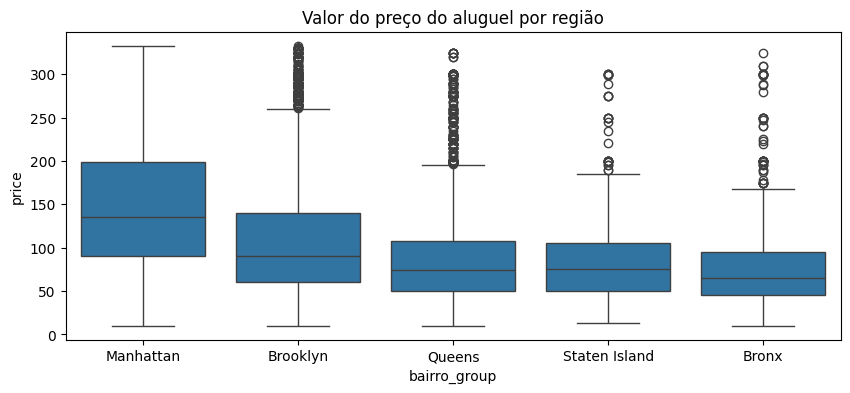

In [14]:
dados_filtro_price = dados.loc[dados['price'] < limite_outliers]

boxplot = sns.boxplot(x='bairro_group', y='price', data=dados_filtro_price)
boxplot.figure.set_size_inches(10,4)
boxplot.set_title('Valor do preço do aluguel por região');

Com a análise observa-se que mesmo com filtro de preço de $334, topo do boxplot das médias de valores, tem-se a presença de outliers quando analisa-se outras regiões fora de Manhattan, indicando a forte presença de outliers dentro do conjunto de dados e a presença de maiores valores nos bairros de Manhattan (principal região responsável pelos outiliers dos dados pois o aluguel nessa região é bem mais caro) e do Brooklyn.

Também é necessário análisar a disponibilidade dos imóveis durante o ano, pois se o imóvel ficar muito tempo disponivel significa que o investimento levará mais tempo para trazer retorno.

In [15]:
dados_manhattan = dados.loc[dados['bairro_group'] == 'Manhattan']
dados_brooklyn = dados.loc[dados['bairro_group'] == 'Brooklyn']
dados_queens = dados.loc[dados['bairro_group'] == 'Queens']
dados_state_island = dados.loc[dados['bairro_group'] == 'Staten Island']
dados_bronx = dados.loc[dados['bairro_group'] == 'Bronx']

# Calculando o describe para cada um dos DataFrames filtrados
describe_manhattan = dados_manhattan['disponibilidade_365'].describe()
describe_brooklyn = dados_brooklyn['disponibilidade_365'].describe()
describe_queens = dados_queens['disponibilidade_365'].describe()
describe_state_island = dados_state_island['disponibilidade_365'].describe()
describe_bronx = dados_bronx['disponibilidade_365'].describe()

# Criando um novo DataFrame para armazenar os resultados
resultado_describe = pd.DataFrame({
    'Manhattan': describe_manhattan,
    'Brooklyn': describe_brooklyn,
    'Queens': describe_queens,
    'Staten Island': describe_state_island,
    'Bronx': describe_bronx
})

print('Análise dos bairros aplicando o describe na disponibilidade de aluguel durante o ano, "disponibilidade_365"')
# Exibindo o resultado
print(resultado_describe)


Análise dos bairros aplicando o describe na disponibilidade de aluguel durante o ano, "disponibilidade_365"
          Manhattan      Brooklyn       Queens  Staten Island        Bronx
count  21660.000000  20094.000000  5666.000000     373.000000  1090.000000
mean     111.984580    100.204141   144.451818     199.678284   165.794495
std      132.678717    126.269798   135.538597     131.852000   135.304079
min        0.000000      0.000000     0.000000       0.000000     0.000000
25%        0.000000      0.000000     2.000000      78.000000    37.000000
50%       36.000000     28.000000    98.000000     219.000000   148.000000
75%      230.000000    188.000000   286.000000     333.000000   313.750000
max      365.000000    365.000000   365.000000     365.000000   365.000000


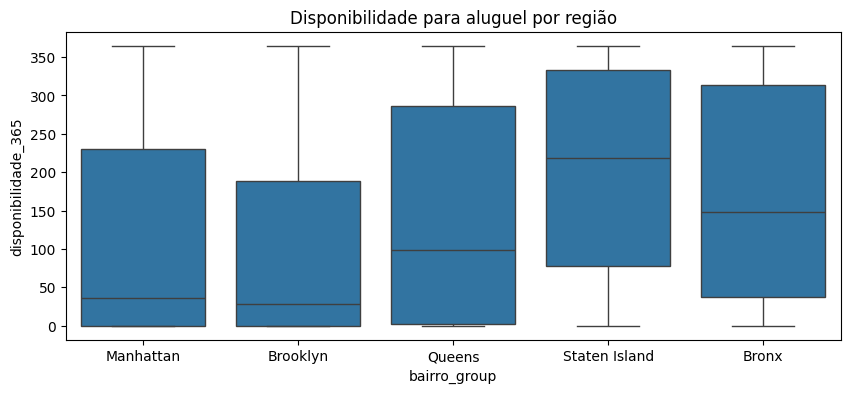

In [16]:
boxplot = sns.boxplot(x='bairro_group', y='disponibilidade_365', data=dados)
boxplot.figure.set_size_inches(10,4)
boxplot.set_title('Disponibilidade para aluguel por região');

Aqui aplicando o describe separadamente por região para demonstrar que os valores médios e quartis de disponibilidade dentro dos bairros apresenta uma indicação que a região do Brooklyn e Manhattan conseguem ficar mais tempo ocupado que os outros bairros (o valor 25% em ambos é zero), então a indicação seria de investimento em um imóvel no Brooklyn ou em Manhattan, pois são boas opções baseadas nas regiões e também considerando que a região de Manhattan possui imóveis com aluguéis mais elevados, o que pode ser considerado na hora da escolha da compra do imóvel.</br>

In [17]:
dados_manhattan = dados.loc[dados['bairro_group'] == 'Manhattan']
dados_brooklyn = dados.loc[dados['bairro_group'] == 'Brooklyn']
dados_queens = dados.loc[dados['bairro_group'] == 'Queens']
dados_state_island = dados.loc[dados['bairro_group'] == 'Staten Island']
dados_bronx = dados.loc[dados['bairro_group'] == 'Bronx']

total_acima_334_manhattan = dados_manhattan.loc[dados_manhattan['price'] > 334].shape[0]
total_acima_334_brooklyn = dados_brooklyn.loc[dados_brooklyn['price'] > 334].shape[0]
total_acima_334_queens = dados_queens.loc[dados_queens['price'] > 334].shape[0]
total_acima_334_state_island = dados_state_island.loc[dados_state_island['price'] > 334].shape[0]
total_acima_334_bronx = dados_bronx.loc[dados_bronx['price'] > 334].shape[0]

print(f"Total de valores acima de $334 em Manhattan: {total_acima_334_manhattan}")
print(f"Total de valores acima de $334 em Brooklyn: {total_acima_334_brooklyn}")
print(f"Total de valores acima de $334 em Queens: {total_acima_334_queens}")
print(f"Total de valores acima de $334 em Staten Island: {total_acima_334_state_island}")
print(f"Total de valores acima de $334 em Bronx: {total_acima_334_bronx}")

Total de valores acima de $334 em Manhattan: 2155
Total de valores acima de $334 em Brooklyn: 689
Total de valores acima de $334 em Queens: 99
Total de valores acima de $334 em Staten Island: 8
Total de valores acima de $334 em Bronx: 21


Aqui estão em valores a quantidade de imóveis que temos acima de outliers em cada região, reforçando novamente que as regiões de Manhattan e Brooklyn terão o retorno mais rápido, pois possuem maior movimentação financeira com a quantidade de dias disponiveis no ano que se enquadra no restante do conjunto de dados. Na análise dos maiores valores de aluguel dentro dos dois primeiros bairros, Manhattan e Brooklyn, encontra-se os maiores valores e como o objetivo é encontrar o melhor retorno de investimento, a indicação, olhando exclusivamente o preço, de investimento de imóveis para aluguel são nessas duas regiões, pois o aluguel é mais elevado em ambos, então o mercado é mais aquecido.</br>

## Análise do número mínimo de noites e disponibilidade ao longo do ano
Para verificar a relação de preço com o número mínimo de noite e disponibilidade ao longo do ano fazeremos uma análise gráfica dessas  variaveis do nosso grupo de dados referentes ao preço, além de uma matriz de correlação.</br>


/home/fabio/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


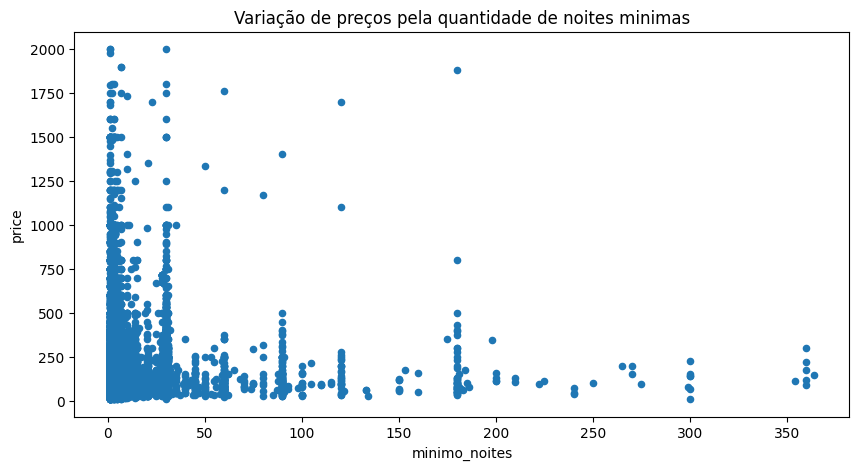

In [18]:
dados_filtrados = dados.loc[dados['minimo_noites'] < 365]
#aplicar um filtro em um ano para facilitar a visualização

dados_filtrados = dados_filtrados.loc[dados_filtrados['price'] < 2000]
# agora nosso valor aceita outliers do conjunto de dados, caso fosse limitado ao limite do outiliers do preço não consegue-se observar
# o comportamento da variavel minimo_noites.

grafico = dados_filtrados.plot.scatter(x='minimo_noites', y='price', figsize=(10,5))

grafico.set_title('Variação de preços pela quantidade de noites minimas');

Existem alguns apartamentos que ainda trabalham com valores elevados dentro do conjunto de dados mesmo com um numero minimo de noites que devem ser reservadas mais elevado, entretanto tem-se uma diminuição dos valores conforme o número minimo de noites aumentam dentro do conjunto de dados.</br>
Com o gráfico podemos observar que conforme o número de noites mininas aumenta o preço do aluguel tende a cair, mas ainda ocorrem varios valores elevados. Importante frisar que já no nosso describe é perceptivel a presença de outliers no 'price' dentro do nosso grupo de dados, mas isso ocorre também devido ao fato de termos outliers de noites minimas dentro do nosso grupo de dados.

In [19]:
dados_filtrados = dados_filtrados.loc[dados_filtrados['price'] < limite_outliers]
#filtro de outliers

dados_filtrados['minimo_noites'].describe()

count    45870.000000
mean         6.576106
std         13.849425
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        364.000000
Name: minimo_noites, dtype: float64

Grande concentração de valores minimos dentro de poucos dias, onde 75% dos dias se encontra dentro de 5 noites minimas.</br>
Uma análise visual do conjunto de dados com os valores mais próximos do boxplot será interessante.

/home/fabio/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


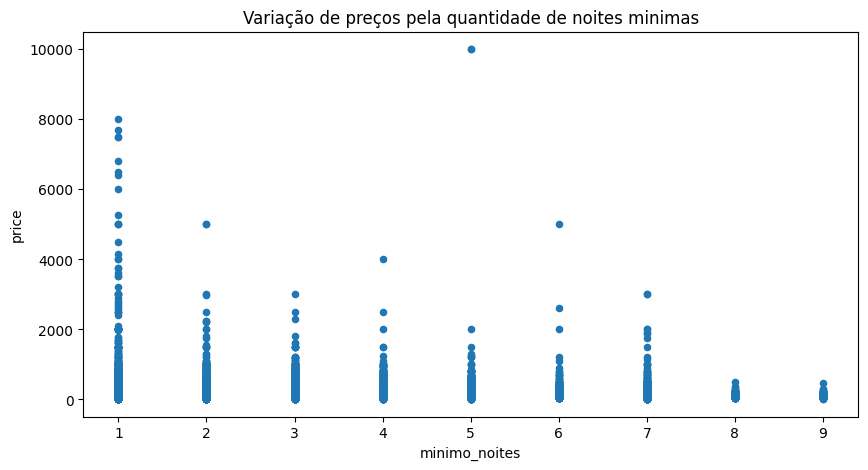

In [20]:
filtro = dados[dados['minimo_noites'] <  10]
grafico = filtro.plot.scatter(x='minimo_noites', y='price', figsize=(10,5))
grafico.set_title('Variação de preços pela quantidade de noites minimas');
#definindo um filtro para auxiliar na visualização sem a grande quantidade de outliers

Aqui observa-se a concentração dos outliers dos preços para os valores minimos de noites menores, conforme esses valores de 'minimo_noites' aumenta a quantidade dos valores preço diminui, entretanto ainda são fortes influencias de outliers dentro do nosso conjunto de dados.<br>

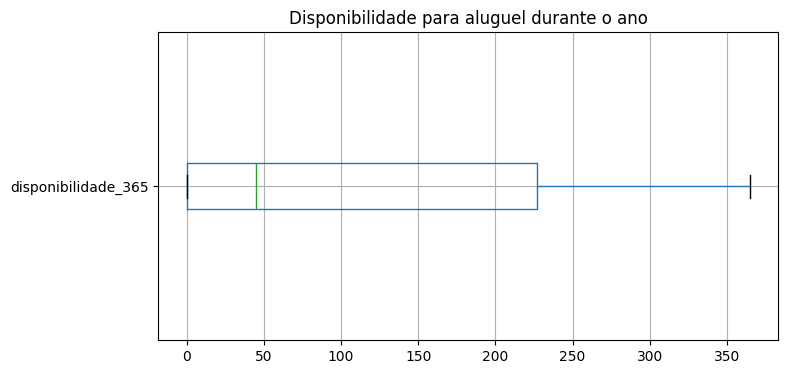

In [21]:
boxplot = dados.boxplot(column='disponibilidade_365',figsize=(6,4), vert=False)
boxplot.figure.set_size_inches(8,4)
boxplot.set_title('Disponibilidade para aluguel durante o ano');

Vemos uma concentração grande de disponibilidade mais baixa dentro do nosso conjunto de dados, o que indica que boa parte do tempo as casas do nosso conjunto de dados está reservada, o que nos auxilia na análise de retorno de investimentos, uma vez que 50% tem menos de 39 dias disponiveis.

In [22]:
dados_filtrados['disponibilidade_365'].describe()

count    45870.000000
mean       109.238609
std        130.204140
min          0.000000
25%          0.000000
50%         39.000000
75%        216.000000
max        365.000000
Name: disponibilidade_365, dtype: float64

In [23]:
dados[['price','minimo_noites','disponibilidade_365']].corr()
# matriz de correlação

,price,minimo_noites,disponibilidade_365
price,1.000000,0.042805,0.081851
minimo_noites,0.042805,1.000000,0.144292
disponibilidade_365,0.081851,0.144292,1.000000


A matriz de correlação define a correlação entre os fatores nela indicado, variando de -1 a 1 dentro da matriz, onde -1 é um fator diretamente negativo (que influencia de forma negativa o valor de relação que está sendo observado, de um para um) e +1 e um fator diretamente positvo (que influencia de forma diretamente positiva o valor que estamos observando, a cada um positivo aumenta em um o valor da caracteristica avaliada), então em relação ao preço tem-se que a coluna 'minimo_noites' tem-se uma influencia de 0.042805 no preço e a cada dia disponivel dentro do ano tem-se o fator de 0.081851, logo <b>a disponibilidade durante o ano tem quase o dobro de influencia dentro do conjunto de dados em relação ao minimo de noites dentro do preço.</b> Vale lembrar que o gráfico 'Variação de preços devido a disponibilidade durante o ano com máximo de $334', ainda nos traz uma baixa influencia dentro dos nosso parâmetros sem outliers.</br>
Aqui vale ressaltar que tem-se esses valores, mas ainda são valores baixos de influência, logo a influência desses fatores não são descartáveis, mas tem-se uma baixa influência em ambos os parâmetros.

## Padrões do nome do local com o preço

Ocorre uma grande quantidade de outiliers dentro do conjunto de preços, o que será tratado em breve nesse notebook de forma mais acertiva, entretanto vamos analisar os nomes referentes so tipos de quarto.

In [24]:
dados['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

Os tipos de imóveis levam a nomenclatura que carrega o termo 'Apartamento/casa completos', 'private room' (quarto privado) e 'shared room' (quarto compartilhado). Abaixo eu vou verificar como isso acontece com os nomes dos locais filtrando pelos imóveis mais caros.

In [25]:
import re

def imoveis_caros_nomes(dados, limite_outliers, words):
  filtro_preco = dados.query(f'price > {limite_outliers}')
  # filtrando apartamentos de alto valor, aqui considerei alto valor maior que o limite do boxplot, antes dos outliers

  filtro_nome = filtro_preco[filtro_preco.nome.str.contains(words, flags=re.IGNORECASE,  na=False)]
  #tornar a busca indiferente a letras maiusculas e minusculas

  contador_preco = filtro_preco.nome.value_counts()
  contador_nomes = filtro_nome.nome.value_counts()

  print(f'Dos imoveis acima de ${limite_outliers}, {round(len(contador_nomes)/len(contador_preco), 4)*100}% levam as palavras "{words}"')
  #calculando a porcentagem de aparições dentro do filtro

In [26]:
imoveis_caros_nomes(dados, limite_outliers,'apartment|apt|loft')
imoveis_caros_nomes(dados, limite_outliers,'private')
imoveis_caros_nomes(dados, limite_outliers,'shared')

Dos imoveis acima de $334.0, 30.54% levam as palavras "apartment|apt|loft"
Dos imoveis acima de $334.0, 5.76% levam as palavras "private"
Dos imoveis acima de $334.0, 0.03% levam as palavras "shared"


Então temos aqui que dentro dos imóveis de preço mais elevado encontramos que  aproximadamente 31% deles levam o nome de 'apartament', 'apt' ou 'loft', ou seja, quase um terço levam esse tipo de nome dentro do nosso conjunto de dados.   

In [27]:
def imoveis_baratos_nomes(dados, limite_outliers, words):
  filtro_preco = dados.query(f'price < {limite_outliers}')
  # filtrando apartamentos de alto valor, aqui considerei alto valor maior que o limite do boxplot, antes dos outliers

  filtro_nome = filtro_preco[filtro_preco.nome.str.contains(words, flags=re.IGNORECASE,  na=False)]
  contador_preco = filtro_preco.nome.value_counts()
  contador_nomes = filtro_nome.nome.value_counts()

  print(f'Dos imoveis abaixo de ${limite_outliers}, {round(len(contador_nomes)/len(contador_preco), 4)*100}% levam as palavras "{words}"')

In [28]:
imoveis_baratos_nomes(dados, limite_outliers,'apartment|apt|loft')
imoveis_baratos_nomes(dados, limite_outliers,'private')
imoveis_baratos_nomes(dados, limite_outliers,'shared')

Dos imoveis abaixo de $334.0, 27.560000000000002% levam as palavras "apartment|apt|loft"
Dos imoveis abaixo de $334.0, 15.52% levam as palavras "private"
Dos imoveis abaixo de $334.0, 0.96% levam as palavras "shared"


# Modelo para previsão do preço

Trabalharemos a pressificação das casas além de descrever as tomadas de decisões e as motivações das escolhas dentro do modelo de ML.<br>
Como visto anteriormente tem-se uma distribuição de preço dos imóveis com bastante outliers dentro do nosso grupo de dados como um todo, tanto em análise total como nos dados por região.

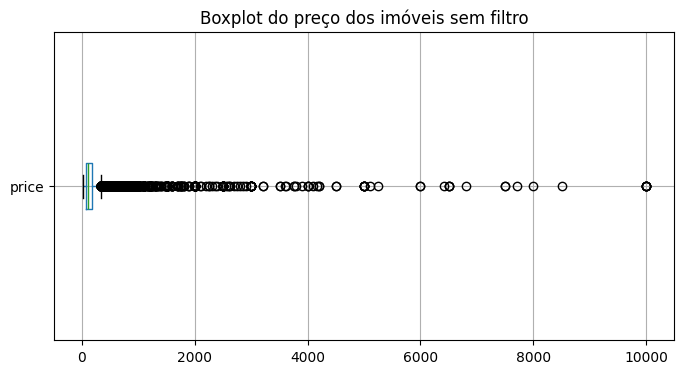

In [29]:
boxplot = dados.boxplot(column='price',figsize=(8,4), vert=False)
boxplot.figure.set_size_inches(8,4)
boxplot.set_title('Boxplot do preço dos imóveis sem filtro');

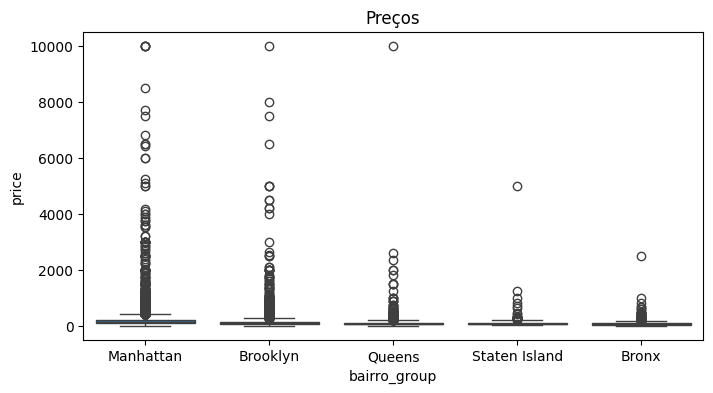

In [30]:
boxplot = sns.boxplot(x='bairro_group', y='price', data=dados)
boxplot.figure.set_size_inches(8,4)
boxplot.set_title('Preços');

Então é necessario um tratamento adequado dos dados antes de tentarmos utilizar qualquer tipo de modelo preditivo no nosso conjunto de dados.<br>

## Trabalhando com os preços dos imóveis
A grande diferença desses dados gera uma série de fatores negativos para nosso conjunto de dados, para trabalhar esse fator vou modificar nossa variável preço, então devemos <b>buscar uma distribuição normal, que permite maiores possibilidades para nosso conjunto de dados (teste estatiscos e a definição do modelo de machine learning possuem melhor precisão em dados com distribuição normal). Para nosso conjunto de dados vamos aplicar a transformação logaritmica</b>.

Importante também ressaltar que nosso problema aqui é um <b>problema de regressão, uma vez que queremos desenvolver um modelo de machine learning que nos possibilite encontrar um valor especifico para os imóveis baseando nos valores das features que temos dentro do nosso dataset.</b>

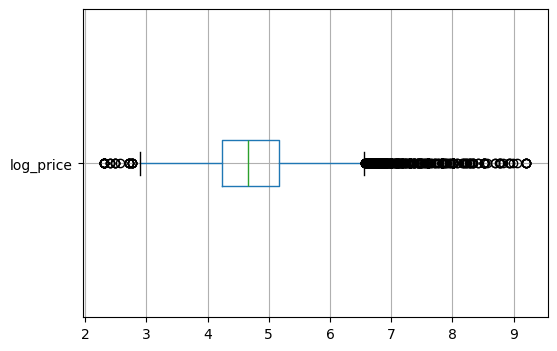

In [31]:
import numpy as np

dados['log_price'] = np.log(dados.price)

boxplot = dados.boxplot(column='log_price', figsize=(6,4), vert=False)
# Criando o boxplot usando a coluna 'log_price' criada

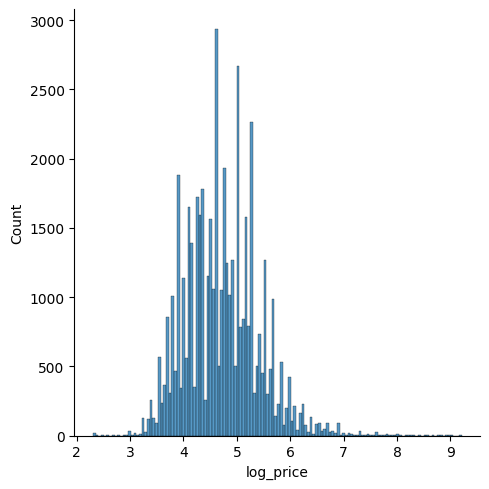

In [32]:
sns.displot(dados['log_price'])

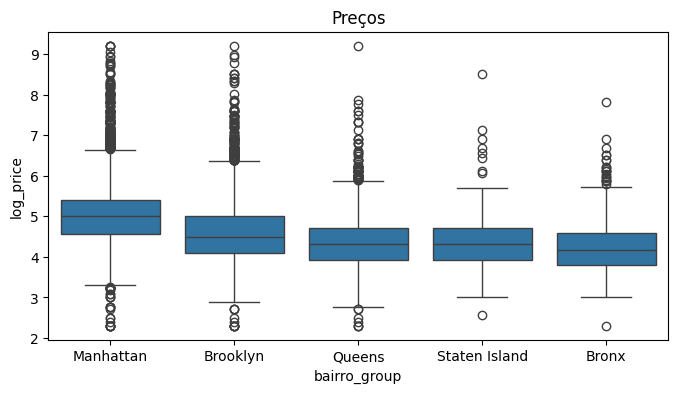

In [33]:
boxplot = sns.boxplot(x='bairro_group', y='log_price', data=dados)
boxplot.figure.set_size_inches(8,4)
boxplot.set_title('Preços');

In [34]:
boxplot_limit(dados, 'log_price')

o valor do limite do boxplot para log_price é de 6.560805177912897, onde será nosso limite


(6.560805177912897, None)

Tratar o dado em logartimico antes de excluir os valores ajuda a termos uma maior quantidade de dados dentro do nosso conjunto de teste e treino se decidirmos remover os outliers. Também faremos as análises de algumas possibilidades para tratar esses valores de outliers, todos descritos dentro do nosso notebook.

### Definindo as variáveis do nosso modelo
Ápos remover alguns features do conjunto de dados, pois elas nao vao influenciar diretamente no nosso modelo (considerando que existe uma possivel melhoria do modelo com a utilização da variavel bairro_group no meu grupo de dados, na seção final desse notebook será desenvolvido esse termo).

In [35]:
dados = dados.drop(columns=['bairro'])
dados.head()

,nome,bairro_group,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,calculado_host_listings_count,disponibilidade_365,log_price
0,Skylit Midtown Castle,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,5.416100
1,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365,5.010635
2,Cozy Entire Floor of Brownstone,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,4.488636
3,Entire Apt: Spacious Studio/Loft by central park,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,4.382027
4,Large Cozy 1 BR Apartment In Midtown East,Manhattan,40.74767,-73.97500,Entire home/apt,200,3,74,1,129,5.298317


Agora que eu retirei essa coluna eu vou trabalhar com 'log' nas colunas necessárias e mudar meu conjunto de dados para um novo nome e trabalhar com o logaritmo nesse novo conjunto.</br>
Vale ressaltar a soma do valor 1 dentro do meu grupo de dados onde possui valor zero dentro da coluna, isso é feito para trabalharmos com o logaritmo em todas as colunas, pois se fosse passar o log do valor zero causaria um erro no código.

In [36]:
dados['log_latitude'] = np.log(dados.latitude)
dados['log_longitude'] = np.log(np.abs(dados['longitude']))
dados['log_minimo_noites'] = np.log(dados.minimo_noites)
dados['log_numero_de_reviews'] = np.log(dados.numero_de_reviews + 1)
dados['log_calculado_host_listings_count'] = np.log(dados.calculado_host_listings_count)
dados['log_disponibilidade_365'] = np.log(dados.disponibilidade_365 + 1)

dados_log = dados[['bairro_group','room_type','log_price', 'log_latitude', 'log_longitude', 'log_minimo_noites', 'log_numero_de_reviews',
                   'log_calculado_host_listings_count', 'log_disponibilidade_365']]
dados_log.head(2)

,bairro_group,room_type,log_price,log_latitude,log_longitude,log_minimo_noites,log_numero_de_reviews,log_calculado_host_listings_count,log_disponibilidade_365
0,Manhattan,Entire home/apt,5.416100,3.707545,4.303846,0.000000,3.828641,0.693147,5.874931
1,Manhattan,Private room,5.010635,3.708903,4.303280,1.098612,0.000000,0.000000,5.902633


In [37]:
dados_log.shape

(48883, 9)

Agora eu preciso trabalhar duas colunas, 'bairro_group' e 'room_type', que estao como 'str' e passar elas para um formato que o computador consiga interpretar na hora de treinar meu modelo, no caso passar para valores numericos, uma vez que a maquina nao interpreta 'str'. 

In [38]:
dados_log.bairro_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [39]:
dados_log.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

#### OneHotEnconding x LabelEnconder
Podemos trabalhar com esses dois termos para aplicarmos a transformação do 'bairro_group' e do 'room_type', existem diversos prós e contras por trás dessa escolha, entretanto nesse projeto trabalharemos com OneHotEnconding, por que sabe-se que Manhattan tem um preço maior que Brooklyn, e assim vai para as outras regiões, então para evitar introdução de vies e também evitar aplicar algum tipo de ordinalidade que não existe nesse conjunto de dados, trabalharemos com OneHotEnconding, mas importante ressaltar que isso tem um custo computacional e também aumenta significativamente minha dimensionalidade no grupo de dados.

In [40]:
dados_log = pd.get_dummies(dados_log, columns=['bairro_group'], dtype=int)
#aplicando onehotenconder com o get_dummies do pandas na coluna 'bairro_group'

dados_log = pd.get_dummies(dados_log, columns=['room_type'], dtype=int)
#aplicando onehotenconder com o get_dummies do pandas na coluna 'room_type'

dados_log.head(2)

,log_price,log_latitude,log_longitude,log_minimo_noites,log_numero_de_reviews,log_calculado_host_listings_count,log_disponibilidade_365,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,5.416100,3.707545,4.303846,0.000000,3.828641,0.693147,5.874931,0,0,1,0,0,1,0,0
1,5.010635,3.708903,4.303280,1.098612,0.000000,0.000000,5.902633,0,0,1,0,0,0,1,0


In [41]:
#arrumando o nome das colunas que possuem espaço, o que gera erros no tratamento dos dados ocasionalmente
dados_log.rename(columns={'bairro_group_Staten Island': 'bairro_group_Staten_Island'}, inplace=True)
dados_log.rename(columns={'room_type_Entire home/apt': 'room_type_Entire_home_apt'}, inplace=True)
dados_log.rename(columns={'room_type_Private room': 'room_type_Private_room'}, inplace=True)
dados_log.rename(columns={'room_type_Shared room': 'room_type_Shared_room'}, inplace=True)

dados_log.head(2)

,log_price,log_latitude,log_longitude,log_minimo_noites,log_numero_de_reviews,log_calculado_host_listings_count,log_disponibilidade_365,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten_Island,room_type_Entire_home_apt,room_type_Private_room,room_type_Shared_room
0,5.416100,3.707545,4.303846,0.000000,3.828641,0.693147,5.874931,0,0,1,0,0,1,0,0
1,5.010635,3.708903,4.303280,1.098612,0.000000,0.000000,5.902633,0,0,1,0,0,0,1,0


In [42]:
dados_log.shape

(48883, 15)

Passamos de 9 atributos para 15 atributos, assim como esperado tivemos um aumento da dimensionalidade do nosso grupo de dados 'dados_log'.

### Criando a base de treino e de teste
Aqui vou definir a base de treino e de teste baseado no meu data set 'dados_log', lembrando que meu objetivo aqui é criar estimativa para o preço dos imóveis.

In [43]:
from sklearn.model_selection import train_test_split

y = dados_log.log_price

X = dados_log[['log_latitude', 'log_longitude', 'log_minimo_noites', 'log_numero_de_reviews', 'log_calculado_host_listings_count', 'log_disponibilidade_365', 
               'bairro_group_Bronx', 'bairro_group_Brooklyn', 'bairro_group_Manhattan', 'bairro_group_Queens',
               'bairro_group_Staten_Island', 'room_type_Entire_home_apt', 'room_type_Private_room', 'room_type_Shared_room']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
#aplicando 25% do conjunto de dados para efetuar os testes, random state de 42

### Aplicando o Statsmodel
Essa biblioteca é para aplicar estimações de diversos tipos de modelos estatisticos, assim como testes e exploração.

In [44]:
import statsmodels.api as sm

X_train_constante = sm.add_constant(X_train)
#aplicar a constante para o statmodels poder trabalhar seu parametro comparativo (intercepto na equação de regressao)

modelo = sm.OLS(y_train, X_train_constante, hasconst=True).fit()
#hascont=true exige que seja passada o valor de constante 1 no modelo futuramente


In [45]:
X_train_constante

,const,log_latitude,log_longitude,log_minimo_noites,log_numero_de_reviews,log_calculado_host_listings_count,log_disponibilidade_365,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten_Island,room_type_Entire_home_apt,room_type_Private_room,room_type_Shared_room
6002,1.0,3.707846,4.304003,0.693147,1.098612,0.000000,0.000000,0,0,1,0,0,1,0,0
30775,1.0,3.706523,4.303508,1.098612,2.708050,0.000000,5.123964,0,1,0,0,0,1,0,0
5198,1.0,3.707112,4.303822,0.693147,5.181784,0.000000,5.655992,0,0,1,0,0,0,1,0
18885,1.0,3.707113,4.302120,0.000000,2.708050,0.693147,5.521461,0,0,0,1,0,0,1,0
42374,1.0,3.708083,4.302840,1.098612,2.639057,0.693147,5.398163,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.0,3.708963,4.303334,1.098612,4.962845,0.693147,5.351858,0,0,1,0,0,0,1,0
44743,1.0,3.707744,4.303554,1.609438,1.386294,0.000000,4.787492,0,0,1,0,0,1,0,0
38169,1.0,3.707955,4.303009,1.098612,1.098612,0.000000,0.000000,0,0,0,1,0,1,0,0
860,1.0,3.706604,4.303533,1.098612,5.468060,0.693147,5.493061,0,1,0,0,0,1,0,0


In [46]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     3157.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:08:56   Log-Likelihood:                -25916.
No. Observations:               36662   AIC:                         5.186e+04
Df Residuals:                   36649   BIC:                         5.197e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

A probabilidade que apresentamos na parte de F-estatistic é 0, se ele fosse maior que 0.05 deveriamos desconsiderar esse modelo, como é zero indica que <b>meu modelo é estatisticamente valido e consideravel</b>.<br>
Também temos o valor <b>R-squared, o nosso r², equivalente ao adj.R-squared, o que indica que é um modelo que leva em consideração todos as variaveis e elas contribuem para nosso modelo. Entretanto o R² leva o fator de aproximadamente 51%</b> apenas. Aqui também temos varias variáveis independentes entre si, mas o valor de R-squared pode ser afetado por outliers e deve ser interpretado cuidadosamente, pois o valor R² pode não estar ajustado corretamente, devido a presença dos outiliers que foram trabalhados anteriormente. <br>
Para os testes individuais dos nosso parâmetros temos um valor de 0.014 no 'log_calculado_host_listings_count', ainda passa no teste, sendo menor que 0.05.

Vale ressaltar alguns pontos relevantes da utilização desse modelo:
* Modelo mais simples:  definido com uma equação, onde expressa a relação entre as variaveis escolhidas, além de levar em consideração todas as variáveis que colocamos dentro do nosso dataset e todas elas terem valores relativamente consideraveis e devem ser utilizadas dentro da nossa previsão;
* Eficiente: ele é eficiente e calculado mais rapidos que outros modelo;
* Consideravemente bem difundido e estudado: um tipo de modelo de ml bem difundido e bem utilizado em ciencia de dados;

Pontos negativos:
* Outliers: apesar do tratamento dos outliers eles ainda podem prejudicar a estimativa, gerando forte impacto na reta de regressão;
* Dependencia de variaveis: ele pode assumir grande dependencia entre as variaveis;
* Variação: esse tipo de modelo define uma variação constante em torno da média;
* Quantidade de variaveis: temos uma quantidade consideravel de variaveis, onde pode afetar o modelo se fosse um conjunto de dados maior.

### A previsão de preço
Agora faremos a previsão com os dados no desafio e aplicaremos dentro do nosso conjunto de dados. Importante lembrar que fizemos a transformação logaritma para trabalhar com os outliers e termos uma curva próxima da normal, então é necessário retornar do log para encontrar um valor estimado verdadeiro.

In [47]:
dados_log.head()

,log_price,log_latitude,log_longitude,log_minimo_noites,log_numero_de_reviews,log_calculado_host_listings_count,log_disponibilidade_365,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten_Island,room_type_Entire_home_apt,room_type_Private_room,room_type_Shared_room
0,5.416100,3.707545,4.303846,0.000000,3.828641,0.693147,5.874931,0,0,1,0,0,1,0,0
1,5.010635,3.708903,4.303280,1.098612,0.000000,0.000000,5.902633,0,0,1,0,0,0,1,0
2,4.488636,3.705863,4.303521,0.000000,5.602119,0.000000,5.273000,0,1,0,0,0,1,0,0
3,4.382027,3.708646,4.303308,2.302585,2.302585,0.000000,0.000000,0,0,1,0,0,1,0,0
4,5.298317,3.707399,4.303727,1.098612,4.317488,0.000000,4.867534,0,0,1,0,0,1,0,0


In [48]:
constante = 1
latitude = 40.75362
longitude = -73.98377
minimo_noites = 1
numero_de_reviews = 45
calculado_host_listings_count = 2
disponibilidade_365 = 355
bairro_group_Bronx = 0
bairro_group_Brooklyn = 0
bairro_group_Manhattan = 1
bairro_group_Queens = 0
bairro_group_Staten_Island = 0
room_type_Entire_home_apt = 1
room_type_Private_room = 0
room_type_Shared_room = 0

entrada = [[constante, np.log(latitude), np.log(np.abs(longitude)), np.log(minimo_noites), np.log(numero_de_reviews), np.log(calculado_host_listings_count), np.log(disponibilidade_365),
            bairro_group_Bronx, bairro_group_Brooklyn, bairro_group_Manhattan, bairro_group_Queens, bairro_group_Staten_Island, 
            room_type_Entire_home_apt, room_type_Private_room, room_type_Shared_room]]

print('O valor estimado para o imóvel disponibilizado no desafio é de ${:.2f}'.format(np.exp(modelo.predict(entrada)[0])))

O valor estimado para o imóvel disponibilizado no desafio é de $245.72


A previsão do valor do imóvel dentro do nosso conjunto de dados é de <b>$245.72.</b><br>
Vale ressaltar a necessidade de colocar a constante de valor 1 por termos colocado a constante comparativa para nosso modelo, citada acima.

In [49]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

modelo.fit(X_train_constante, y_train)

modelo.score(X_train_constante, y_train)

0.5082810838310858

In [50]:
import numpy as np
import statsmodels.api as sm

# Supondo que X_train e y_train já estejam definidos

# Adicionando a constante ao X_train
X_train_constante = sm.add_constant(X_train)

# Criando e ajustando o modelo OLS
modelo = sm.OLS(y_train, X_train_constante, hasconst=True).fit()

# Obtendo os valores previstos pelo modelo
y_pred = modelo.predict(X_train_constante)

# Calculando o erro quadrático médio (MSE)
mse = ((y_pred - y_train) ** 2).mean()
print(f"MSE: {mse}")

# Calculando o coeficiente de determinação (R^2)
r_squared = modelo.rsquared
print(f"R^2: {r_squared}")


MSE: 0.24072130351440618
R^2: 0.5082810838310879


## Salvando o modelo
Aqui vamos salvar o nosso modelo no formato 'pkl' para poder aplica-lo futuramente.

In [51]:
import pickle

saida = open('modelo_fabio_dias.pkl', 'wb')
pickle.dump(modelo, saida)
saida.close()

# Agradecimentos e considerações finais
Gostaria de agradecer a empresa Indicium pela oportunidade e pelo desafio, foram muitas horas investidas nesse projeto que me orgulho de ter desenvolvido e que trouxe muito aprendizado que utilizarei em minha carreira. Fico muito feliz pelo trabalho realizado, mas também gostaria de ter mais tempo para continuar melhorando tudo aquilo que foi desenvolvido aqui, fico com a sensação de trabalho concluido, mas também a sensação de poder fazer ainda mais. </br>
Enquanto eu revisava tudo o que foi desenvolvido eu pensei em várias possiveis melhorias e novas análises que eu consideraria fazer, principalmente pensando se estivesse fazendo um trabalho real em uma empresa quais pontos eu iria consultar com pessoas mais experientes que eu, então vou listar aqui os pontos que achei relevante e que caberiam revisão, considero que são pontos que poderia melhorar futuramente nesse projeto.
* T-test das regiões do Brooklyn e de Manhattan, uma vez que era cabivel aplicar esse teste estatistico para verificar a diferença dos valores residênciais dessas regiões;
* Conferir a quantidade de noites minimas, otuliers e a matriz de correlação dos outros fatores dentro do meu conjunto de dados;
* Acredito que uma possivel separação das regiões e uma análise especifica dos bairros dentro dessa região poderia trazer mais precisão para a afirmação de preços das casas e um modelo com melhor predição, entretanto dentro do conjunto de dados são mais de 200 bairros diferentes e eu não consegui pensar em caminhos a seguir para fazer essa analise e nem se ela valeria o tempo investido, uma vez que tenho a limitação de tempo desse projeto;
* Aplicação do labelEnconder e comparação com a previsão dos resultados do oneHotEncode, gostaria de mais tempo para trabalhar unica e exclusivamente nessa comparação, pois minha escolha foi baseada apenas nas referências e na base de dados que eu tinha, nao consegui verificar se geraria uma ordinalidade nos dados e achei essa hipotese muito interessante e que pode ser aplicada em casos especificos.

No mais eu fico ansioso pelo retorno da empresa, li boa parte do site e achei impressionante o que vocês construiram e como trabalham, além das diversas premiações pelo bom trabalho que a empresa consegue desenvolver.